## Hypothesis test

### claim: wines with high quality rating have higher median alcohol content than wines with low quality rating

In [ ]:
# libraries

import numpy as np
import pandas as pd

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

In [3]:
df = pd.read_csv(url, sep=';', header=0, usecols=['alcohol', 'quality'])

df.head()

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5


In [4]:
# lets see some basic statistics
df.describe()

,alcohol,quality
count,1599.000000,1599.000000
mean,10.422983,5.636023
std,1.065668,0.807569
min,8.400000,3.000000
25%,9.500000,5.000000
50%,10.200000,6.000000
75%,11.100000,6.000000
max,14.900000,8.000000


In [5]:
# check for null values
df.isnull().sum()

alcohol    0
quality    0
dtype: int64

### dividing dataset to subsets: high quality alcohol and low quality alcohol

In [6]:
# create 2 subsets that are original of the other
low_grade_alcohol = df[df['quality'] <= 5]
high_grade_alcohol = df[df['quality'] > 5]

### testing for assumptions i.e. homogeneity

In [8]:
"""
HYPOTHESES

null hypothesis Ho : The variance are equal across all the samples/independent groups
alternative hypothesis Ha : The variance are not equal acrosss the sample/independent groups

If we get a p-value larger than 0.05, 
we can assume that the data is heteroscedastic and can continue carrying out the t-test.
"""

'\nHYPOTHESES\n\nHo : The variance are equal across all the samples/independent groups\nHa : The variance are not equal acrosss the sample/independet groups\n\nIf we get a p-value larger than 0.05, \nwe can assume that the data is heteroscedastic and can continue carrying out the t-test.\n'

In [9]:
# bartletts test
from scipy.stats import bartlett

In [21]:
# subsetting the data
high_quality = high_grade_alcohol['alcohol']
low_quality = low_grade_alcohol ['alcohol']

# bartlett's test
stat, p = bartlett(high_quality, low_quality)
print('stat:',stat, ' p_value:', p)

stat: 108.97241772227558  p_value: 1.6455993254217033e-25


In [11]:
"""

In this scenario, the P-value is less than alpha therefore we need not continue with the t-test

"""

'\n\nIn this scenario, the P-value is less than alpha therefore we need not continue with the t-test\n\n'

### testing for normality

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

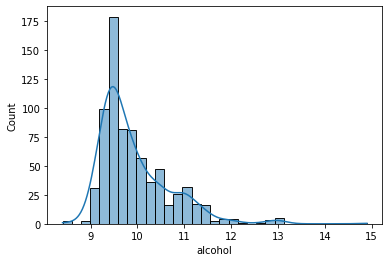

In [22]:

import seaborn as sns

sns.histplot(data=low_grade_alcohol, x='alcohol', kde=True)

In [30]:
"""
Clearly the data is not normal!
It is skewed to the left.
"""

'\nClearly the data is not normal!\nIt is skewed to the left.\n'

In [ ]:
"""
Since the data does not meet either of the assumptions, and the question requires
 us to use median, a nonparametric test e.g. wilcoxon rank-sum test will apply.
"""

### medians of the subsets

In [24]:
high_quality.describe()


count    855.000000
mean      10.855029
std        1.106109
min        8.400000
25%       10.000000
50%       10.800000
75%       11.700000
max       14.000000
Name: alcohol, dtype: float64

In [25]:
low_quality.describe()

count    744.000000
mean       9.926478
std        0.758007
min        8.400000
25%        9.400000
50%        9.700000
75%       10.300000
max       14.900000
Name: alcohol, dtype: float64

In [ ]:
# we see the median above for both subsets.

### declaring null hypothesis(Ho) and alternative hypothesis(Ha)

In [ ]:
"""
null Ho : there is no significant difference between the median alcohol content for high quality alcohol and low quality alcohol
alternative Ha: the median alcohol content for high quality alcohol is significantly higher than for low quality alcohol

"""

In [31]:
from scipy import stats

# we'll take sample of 200 from both high quality and low quality subsets

data1 = high_quality.sample(n=200, random_state=42)
data2 = low_quality.sample(n=200, random_state=42)

In [32]:
# now we perform the test

stat, p = stats.ranksums(data1, data2)
print("Wilcoxon rank-sums test statistic:", stat)
print("p-value:", p)

Wilcoxon rank-sums test statistic: 7.322191030271644
p-value: 2.439545299597334e-13


In [ ]:
"""
The P-value is less than 0.05 therefore we reject the null hypothesis.
"""